Problem 1.c:
Probability mass function vs Probability density function

Probability Mass Function will give the probabilty that a discrete random variable is equal to some countable value.

Probability Density Function will give the relative likelihood of a continuous random variable taking values in an interval.

The main differances are discrete vs continous variables, on a countable value vs an interval of values, and probability vs. not a probability. 

Problem 2.c:
What is skew in MapReduce?

This is an imbalance of data distribution commonly in reducers. It creates a hold up on run time.

Problem 4:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [10]:
df = pd.read_csv("LA_AQ.csv")
df_num = df.select_dtypes(include="number")

Pairwise scatterplots

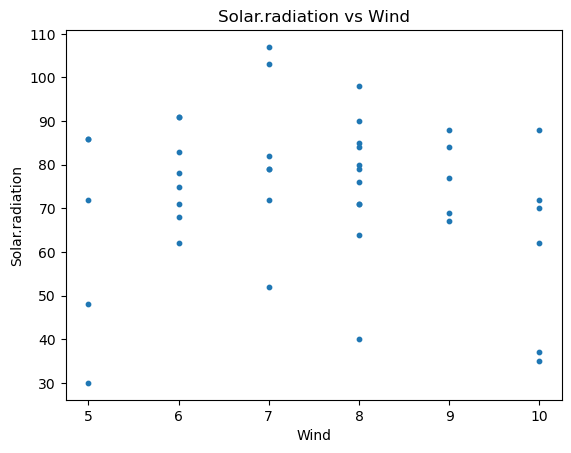

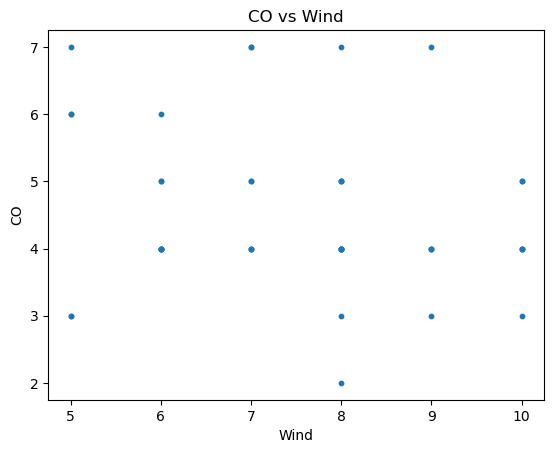

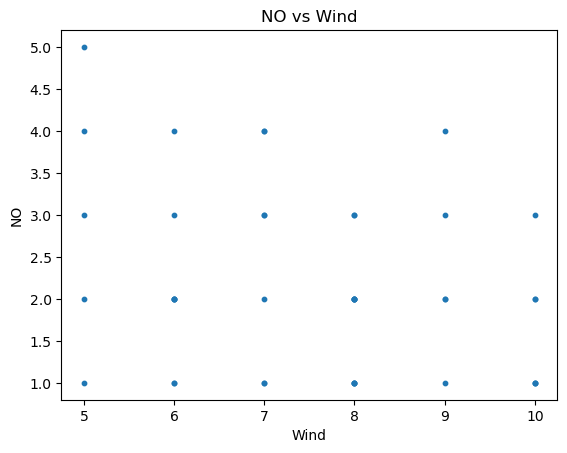

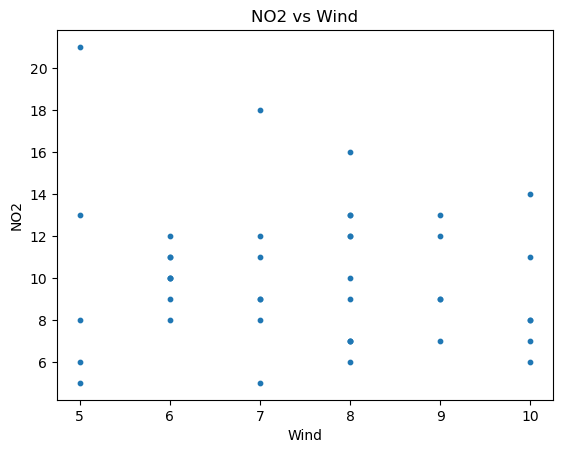

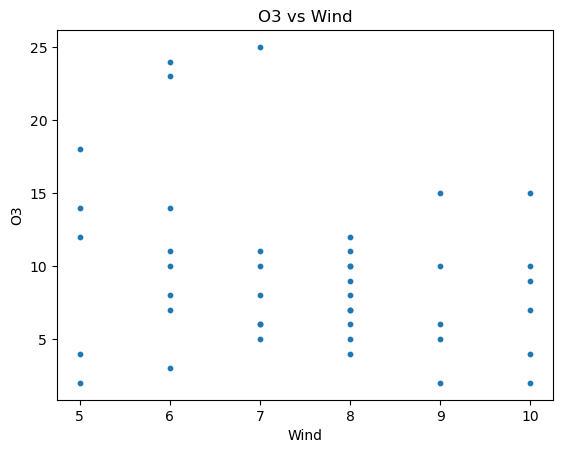

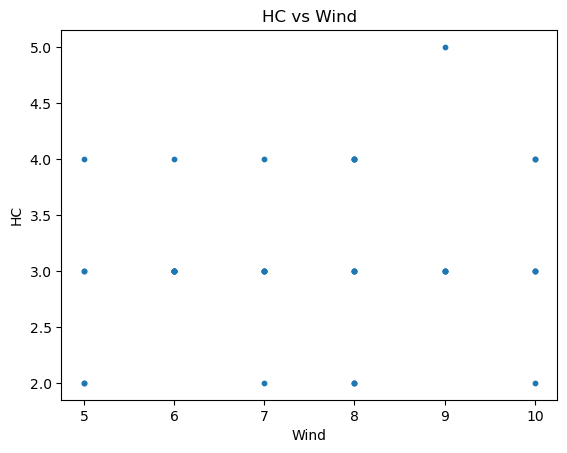

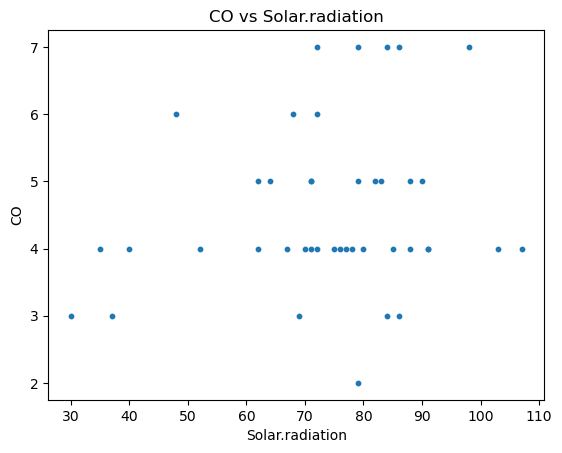

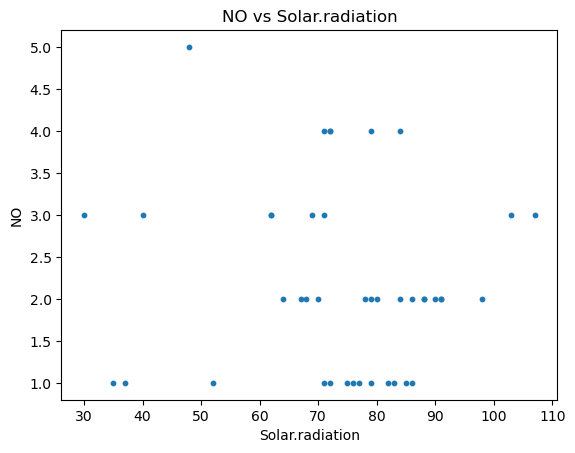

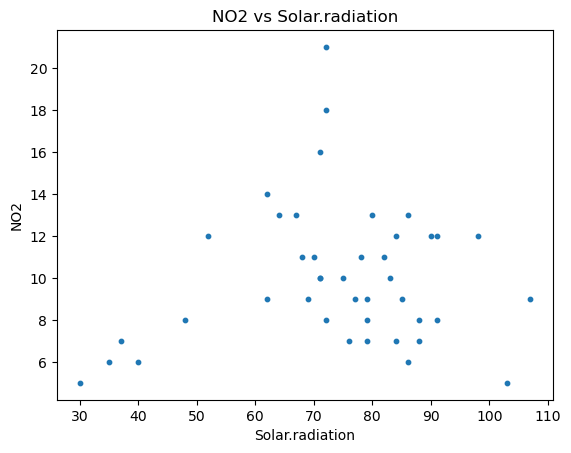

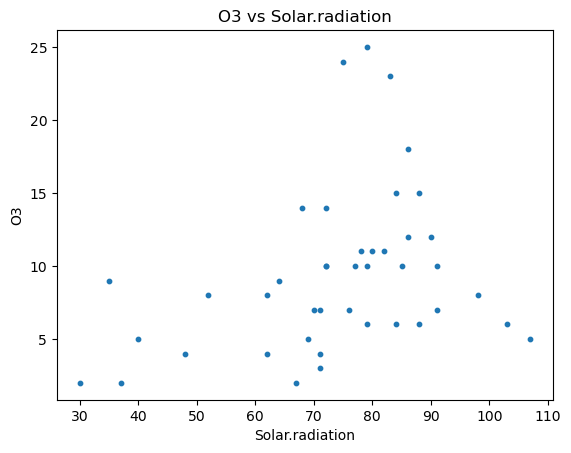

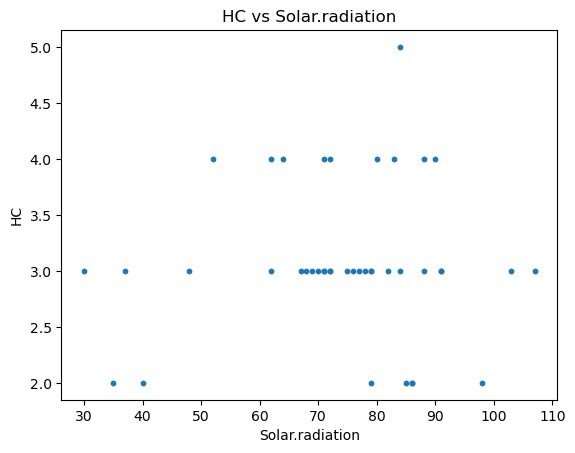

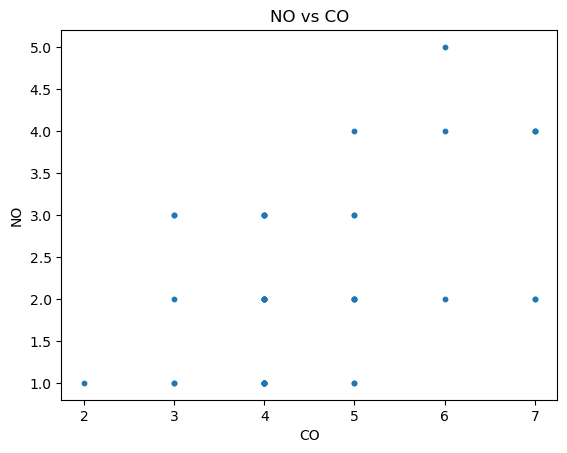

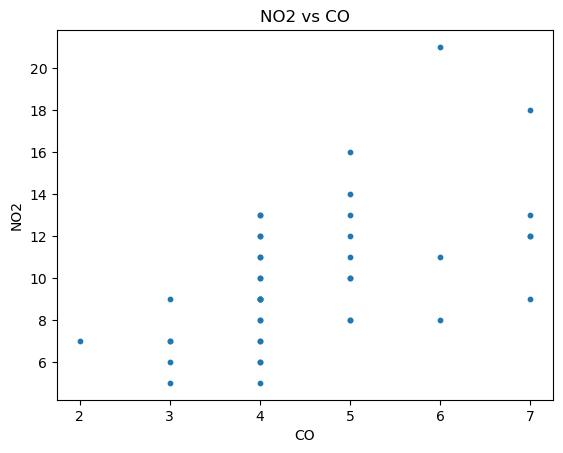

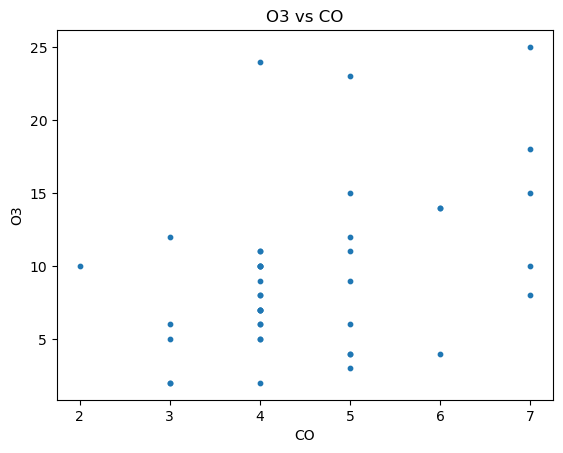

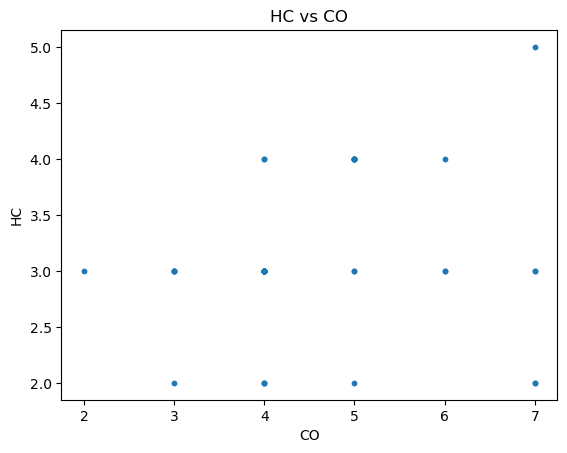

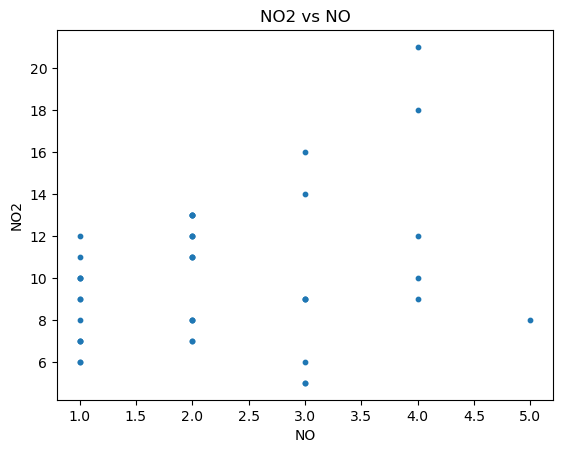

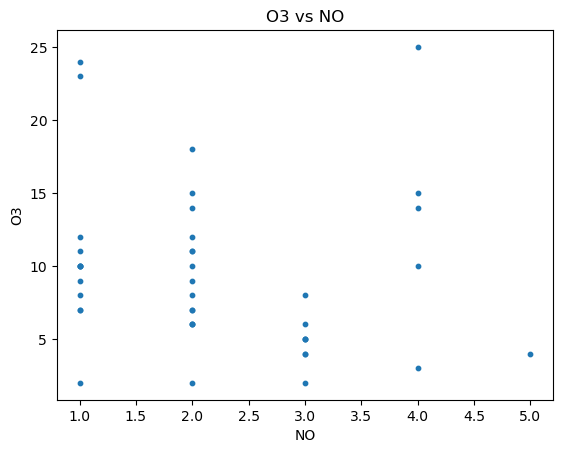

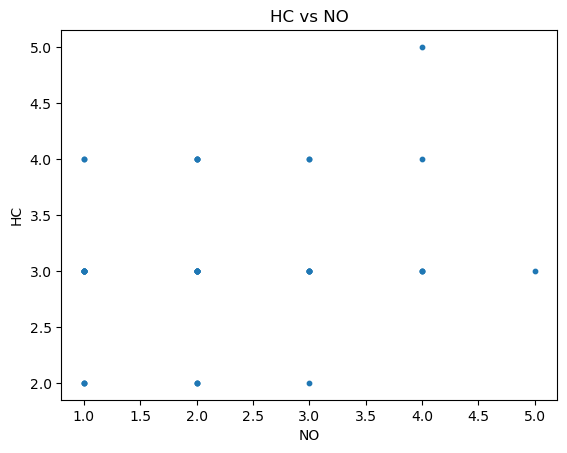

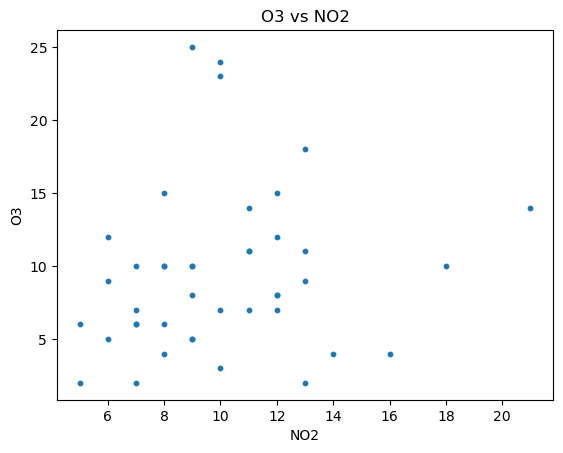

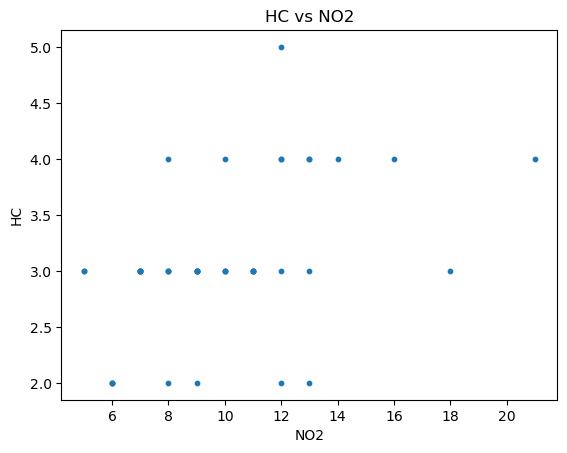

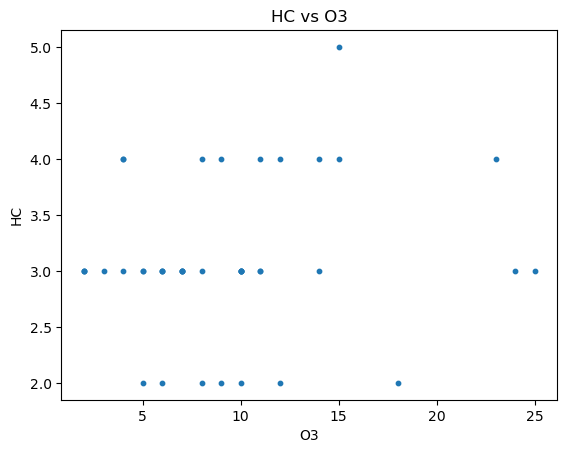

In [11]:
num_cols = df_num.columns
for x, y in itertools.combinations(num_cols, 2):
    plt.scatter(df_num[x], df_num[y], s=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x}")
    plt.show()

Means, Covariance, Correlation

In [13]:
means = df_num.mean()
print(means)

Wind                7.500000
Solar.radiation    73.857143
CO                  4.547619
NO                  2.190476
NO2                10.047619
O3                  9.404762
HC                  3.095238
dtype: float64


In [14]:
cov_mat = df_num.cov()
print(cov_mat)

                     Wind  Solar.radiation        CO        NO        NO2  \
Wind             2.500000        -2.780488 -0.378049 -0.463415  -0.585366   
Solar.radiation -2.780488       300.515679  3.909408 -1.386760   6.763066   
CO              -0.378049         3.909408  1.522067  0.673635   2.314750   
NO              -0.463415        -1.386760  0.673635  1.182346   1.088269   
NO2             -0.585366         6.763066  2.314750  1.088269  11.363531   
O3              -2.231707        30.790941  2.821719 -0.810685   3.126597   
HC               0.170732         0.623693  0.141696  0.176539   1.044135   

                        O3        HC  
Wind             -2.231707  0.170732  
Solar.radiation  30.790941  0.623693  
CO                2.821719  0.141696  
NO               -0.810685  0.176539  
NO2               3.126597  1.044135  
O3               30.978513  0.594657  
HC                0.594657  0.478513  


In [15]:
corr_mat = df_num.corr()
print(corr_mat)

                     Wind  Solar.radiation        CO        NO       NO2  \
Wind             1.000000        -0.101442 -0.193803 -0.269543 -0.109825   
Solar.radiation -0.101442         1.000000  0.182793 -0.073569  0.115732   
CO              -0.193803         0.182793  1.000000  0.502152  0.556584   
NO              -0.269543        -0.073569  0.502152  1.000000  0.296898   
NO2             -0.109825         0.115732  0.556584  0.296898  1.000000   
O3              -0.253593         0.319124  0.410929 -0.133952  0.166642   
HC               0.156098         0.052010  0.166032  0.234704  0.447768   

                       O3        HC  
Wind            -0.253593  0.156098  
Solar.radiation  0.319124  0.052010  
CO               0.410929  0.166032  
NO              -0.133952  0.234704  
NO2              0.166642  0.447768  
O3               1.000000  0.154451  
HC               0.154451  1.000000  


Heatmaps

From these two heatmaps below, the correlation is more useful, as it shows clear relation between the variables. It is noticed that NO2 and CO show the most correlation between each other. 

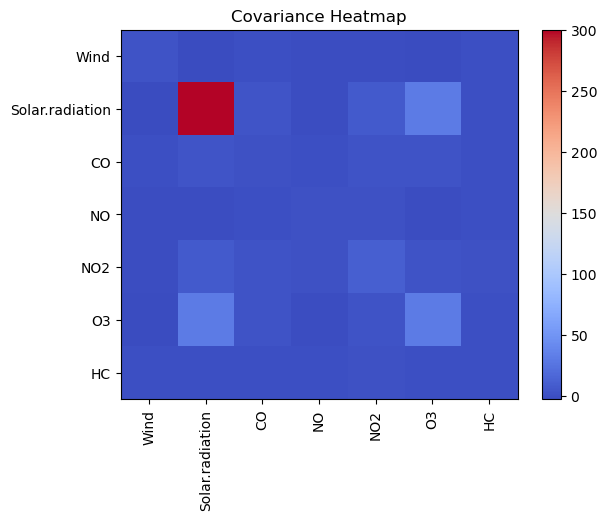

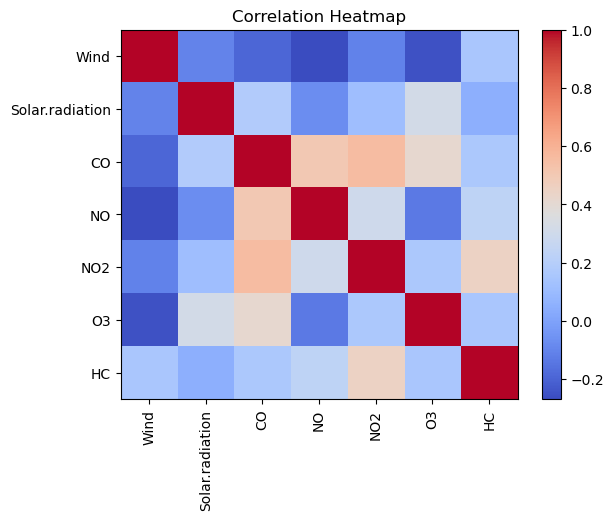

In [21]:
def heatmap(matrix, title):
    fig, ax = plt.subplots()
    cax = ax.imshow(matrix.values, cmap = "coolwarm", aspect = "auto")
    ax.set_xticks(np.arange(len(matrix.columns)))
    ax.set_xticklabels(matrix.columns, rotation = 90)
    ax.set_yticks(np.arange(len(matrix.index)))
    ax.set_yticklabels(matrix.index)
    fig.colorbar(cax)
    plt.title(title)
    plt.show()
heatmap(cov_mat, "Covariance Heatmap")
heatmap(corr_mat, "Correlation Heatmap")
    

Interpretation - Find strongest pairs

Here we show again that CO and NO2 have a strong relationship. CO and NO have good relationship as well with second highest correlation in the pairs. 

In [ ]:
pairs = []
cols = corr_mat.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        pairs.append((cols[i], cols[j], corr_mat.iloc[i, j]))
sorted_pairs = sorted(pairs, key = lambda x: abs(x[2]), reverse = True)
print(sorted_pairs[:3])

[('CO', 'NO2', 0.5565838031967634), ('CO', 'NO', 0.5021524568985598), ('NO2', 'HC', 0.4477678025154071), ('CO', 'O3', 0.4109287516888067), ('Solar.radiation', 'O3', 0.3191237332773967)]
